# Example 5.3

Import necessary packages

In [1]:
import numpy as np
from MOT_2dim2assets import *
from MOT_2dim3assets import *
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
style.use('ggplot')
from mpl_toolkits.mplot3d import axes3d, Axes3D
print("Necessary Packages imported")

Necessary Packages imported


Define the relevant payoff function
\begin{align}
&c_{1,K}(S_{t_1}^1,S_{t_2}^1,S_{t_1}^2,S_{t_2}^2)=\left(K-\max_{i,k}\{S_{t_i}^k\}\right)_+
\end{align}

In [2]:
def c_1(s_11,s_12,s_21,s_22,K=10):
    return np.max([K-np.max([s_11,s_12,s_21,s_22]),0])

Define the marginals:
\begin{align*}
&S_{t_1}^1 \sim \mathcal{U}(\{8,10,12\}),\\
&S_{t_2}^1 \sim \mathcal{U}(\{7,9,11,13\}),\\
&S_{t_1}^2 \sim \mathcal{U}(\{8,10,12\}),\\
&S_{t_2}^2 \sim \mathcal{U}(\{4,7,10,13,16\}),\\
\end{align*}

In [3]:
# First Security
p11 = np.repeat(1/3,3)
v11 = [8,10,12]
p21 = np.repeat(1/4,4)
v21 = [7,9,11,13]
# Second Security
p12 = np.repeat(1/3,3)
v12 = [8,10,12]
p22 = np.repeat(1/5,5)
v22 = [4,7,10,13,16]

## Remark

Let prices of $1_{\{\max\{S_{t_i}^k,S_{t_j}^l\} \leq x\}}$ be given for all $x$, i.e., we know a function $\pi$ such that 
$$
\pi(x)=\mathbb{E}_{\mathbb{Q}}\left[1_{\{\max\{S_{t_1}^1,S_{t_1}^2\} \leq x\}}\right] \text{ for all } x \in \mathbb{R}.
$$
Then the above equation is equivalent to
$$
\pi(x)=\mathbb{E}_{\mathbb{Q}}\left[1_{\{\max\{S_{t_1}^1,S_{t_1}^2\} \leq x\}}\right]\text{ for all } x \in \operatorname{supp}(S_{t_i}^k)\cup \operatorname{supp}(S_{t_j}^l).
$$
with 
$$
1=\pi(x^*)=\mathbb{E}_{\mathbb{Q}}\left[1_{\{\max\{S_{t_1}^1,S_{t_1}^2\} \leq x^*\}}\right]\text{ for } x^* =\max\left\{\operatorname{supp}(S_{t_i}^k)\cup \operatorname{supp}(S_{t_j}^l)\right\}
$$

## Computation of the prices of $c_1$ in dependence of price information on digital options(Linear Programming)

Compute Prices of $c_1$ in dependence of price information on prices of $1_{\{\max\{S_{t_1}^1,S_{t_1}^2\} \leq 8\}}$ and $1_{\{\max\{S_{t_1}^1,S_{t_1}^2\} \leq 10\}}$. This is because of the structure of the marginals equivalent to the knowledge of $1_{\{\max\{S_{t_1}^1,S_{t_1}^2\} \leq x\}}$ for all $x$ (since $\mathbb{E}_{\mathbb{Q}}\left[1_{\{\max\{S_{t_1}^1,S_{t_1}^2\} \leq 12\}}\right] =1$ this is sufficient)

Computation of the grid

In [6]:
index_set = [[1,1,1,2]]
copula_strikes = [[8,10]]
# No of discretization Points (of the grid)
N = 20
# Initialize Grid
possible_prices_1 = np.linspace(0,0.27,N)
possible_prices_2 = np.linspace(0.3,0.7,N)
grid1_9 = np.zeros((N,N))
grid1_11 = np.zeros((N,N))
grid1_9_wo_martingale = np.zeros((N,N))
grid1_11_wo_martingale = np.zeros((N,N))

# define payoffs for fixed strikes
def c1_9(s_11,s_12,s_21,s_22):
    return c_1(s_11,s_12,s_21,s_22,9)
def c1_11(s_11,s_12,s_21,s_22):
    return c_1(s_11,s_12,s_21,s_22,11)

for i in range(N):
    for j in range(N):
        copula_prices_var = [[possible_prices_1[i],possible_prices_2[j]]]
        try:
            grid1_9[i,j] = opt_plan_discrete_multiasset(v11,p11,v12,p12,v21,p21,v22,p22,func=c1_9,minimize=False,
                                         copula_indices = index_set,
                                         copula_strikes=copula_strikes,
                                         copula_prices=copula_prices_var)[0]
            grid1_9_wo_martingale[i,j] = opt_plan_discrete_multiasset(v11,p11,v12,p12,v21,p21,v22,p22,func=c1_9,minimize=False,
                                         copula_indices = index_set,
                                         copula_strikes=copula_strikes,
                                         copula_prices=copula_prices_var,martingale_condition=False)[0]
        except:
            pass
        
for i in range(N):
    for j in range(N):
        copula_prices_var = [[possible_prices_1[i],possible_prices_2[j]]]
        try:
            grid1_11[i,j] = opt_plan_discrete_multiasset(v11,p11,v12,p12,v21,p21,v22,p22,func=c1_11,minimize=False,
                                         copula_indices = index_set,
                                         copula_strikes=copula_strikes,
                                         copula_prices=copula_prices_var)[0]
            grid1_11_wo_martingale[i,j] = opt_plan_discrete_multiasset(v11,p11,v12,p12,v21,p21,v22,p22,func=c1_11,minimize=False,
                             copula_indices = index_set,
                             copula_strikes=copula_strikes,
                             copula_prices=copula_prices_var,martingale_condition=False)[0]
        except:
            pass 

# Plot of the results

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

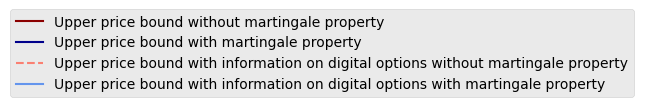

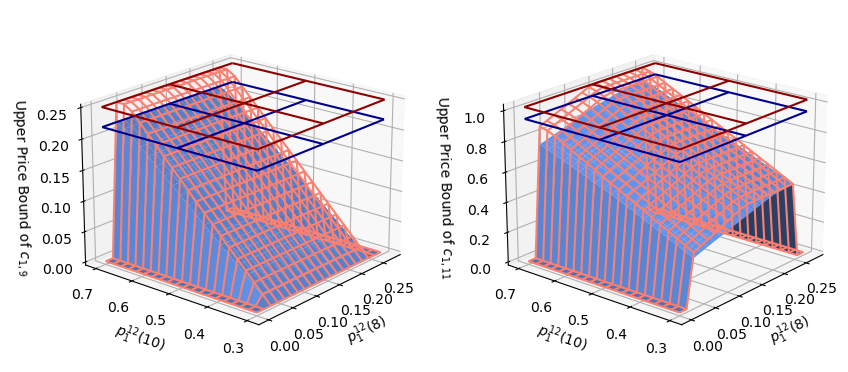

In [9]:
# LEGEND

first = [1]
second = [1]
third = [1]
fourth = [1]
style.use('ggplot')
plt.figure(figsize=(7.5,1))
plt.plot(first,linestyle='solid',color = "darkred")
plt.plot(second,linestyle='solid',color = "darkblue")
plt.plot(third,linestyle='dashed',color = "salmon")
plt.plot(fourth,color = "cornflowerblue")

plt.legend(['Upper price bound without martingale property',
            'Upper price bound with martingale property', 
            'Upper price bound with information on digital options without martingale property',
            'Upper price bound with information on digital options with martingale property'],
           loc='right')
plt.axis('off')
plt.savefig('eps/discrete_copula_info_legend.eps', format='eps')

# 3D PLOT
x = possible_prices_1
y = possible_prices_2
X, Y = np.meshgrid(x, y)

# creating a smaller grid to display the upper bounds
x_small = np.linspace(0,0.27,3)
y_small = np.linspace(0.3,0.7,3)
X_small, Y_small = np.meshgrid(x_small, y_small)


style.use('default')
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_wireframe(X_small, Y_small , np.ones((3,3))*np.max(np.max(grid1_9)),color = "darkblue")
ax.plot_wireframe(X_small, Y_small , np.ones((3,3))*np.max(np.max(grid1_9_wo_martingale)),color = "darkred")
ax.plot_surface(X, Y , grid1_9,color = "cornflowerblue")
ax.plot_wireframe(X, Y , grid1_9_wo_martingale,color = "salmon")
ax.view_init(20,  220)
ax.set_xlabel(r'$p_1^{12}(8)$')
ax.set_ylabel(r'$p_1^{12}(10)$')
ax.set_zlabel("Upper Price Bound of " + r'$c_{1,9}$')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_wireframe(X_small, Y_small , np.ones((3,3))*np.max(np.max(grid1_11)),color = "darkblue")
ax.plot_wireframe(X_small, Y_small , np.ones((3,3))*np.max(np.max(grid1_11_wo_martingale)),color = "darkred")
ax.plot_surface(X, Y , grid1_11,color = "cornflowerblue")
ax.plot_wireframe(X, Y , grid1_11_wo_martingale,color = "salmon")
ax.view_init(20,  220)
ax.set_xlabel(r'$p_1^{12}(8)$')
ax.set_ylabel(r'$p_1^{12}(10)$')
ax.set_zlabel("Upper Price Bound of " + r'$c_{1,11}$')
# Save the plot
plt.savefig('eps/discrete_copula_info.eps', format='eps',bbox_inches='tight')
plt.show()